# 지표: 반복하기 - 데이터 EDA, 회귀 모델 학습, 배포

In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt
import matplotlib as mpl

## 데이터 불러오기

In [2]:
with open('X_data.pkl', 'rb') as f:
    X_data = pickle.load(f)

with open('Y_data.pkl', 'rb') as f:
    Y_data = pickle.load(f)

print(f'type(X_data): {type(X_data)}, len(X_data): {len(X_data)}')
print(f'type(Y_data): {type(Y_data)}, len(Y_data): {len(Y_data)}')

type(X_data): <class 'list'>, len(X_data): 300
type(Y_data): <class 'list'>, len(Y_data): 300


## 데이터 정규화

In [3]:
X_data = np.array(X_data).reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data)
X_data[:5]

array([[0.32671984],
       [0.        ],
       [0.03588252],
       [0.22116288],
       [0.32812547]])

## 회귀 모델 학습 및 시각화

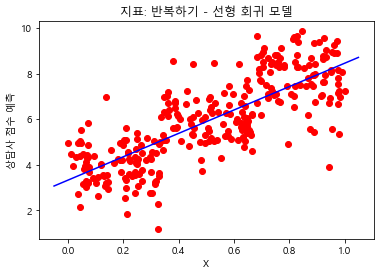

model coefficient: [5.13140541]
model intercept: 3.320276343191396


In [4]:
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정

model = LinearRegression()
npxl = np.array(X_data)
npyl = np.array(Y_data)
model.fit(npxl.reshape(-1, 1), npyl)

plt.scatter(npxl, npyl, c='red')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_plot = np.linspace(xmin, xmax)

plt.plot(x_plot, x_plot*model.coef_ + model.intercept_, color='blue')
plt.title('지표: 반복하기 - 선형 회귀 모델')
plt.xlabel('X')
plt.ylabel('상담사 점수 예측')
plt.show()

print(f'model coefficient: {model.coef_}')
print(f'model intercept: {model.intercept_}')

## 모델 배포

In [5]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print('Deployed.')

Deployed.


## R2 스퀘어(결정 계수) 계산

In [6]:
from sklearn.metrics import r2_score

preds = []

for x in npxl:
    pred = model.predict([x])
    preds.append(pred)

preds = np.array(preds)
print(f'r2_score: {r2_score(npyl, preds)}')

r2_score: 0.6119985403748613
